In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import random

In [2]:
df = pd.read_csv('cruise_ship_info.csv')

# Exploratory Data Analysis and Visualization

In [3]:
df.head()

,Ship_name,Cruise_line,Age,Tonnage,passengers,length,cabins,passenger_density,crew
0,Journey,Azamara,6,30.277,6.94,5.94,3.55,42.64,3.55
1,Quest,Azamara,6,30.277,6.94,5.94,3.55,42.64,3.55
2,Celebration,Carnival,26,47.262,14.86,7.22,7.43,31.80,6.70
3,Conquest,Carnival,11,110.000,29.74,9.53,14.88,36.99,19.10
4,Destiny,Carnival,17,101.353,26.42,8.92,13.21,38.36,10.00


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Ship_name          158 non-null    object 
 1   Cruise_line        158 non-null    object 
 2   Age                158 non-null    int64  
 3   Tonnage            158 non-null    float64
 4   passengers         158 non-null    float64
 5   length             158 non-null    float64
 6   cabins             158 non-null    float64
 7   passenger_density  158 non-null    float64
 8   crew               158 non-null    float64
dtypes: float64(6), int64(1), object(2)
memory usage: 11.2+ KB


Observe that there is no missing value, and the data types of the values are appropriate. 

In [5]:
# Examine the ship_name column
print('Unique Ship Names:', len(df.Ship_name.unique()))

# Drop the column since it does not contain important information

df = df.drop('Ship_name', axis=1)

Unique Ship Names: 138


Unique Cruise_line: 20


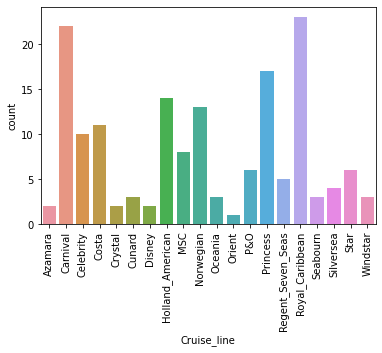

In [6]:
# Examine the Cruise_line column
print('Unique Cruise_line:', len(df.Cruise_line.unique()))

# countplot of the cruise_line
ax = sns.countplot(df.Cruise_line)
ax = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

The Cruise_line column might be able to provide further information.

In [7]:
# take a close look at the numeric columns
numeric_col = df.columns[2:].tolist()

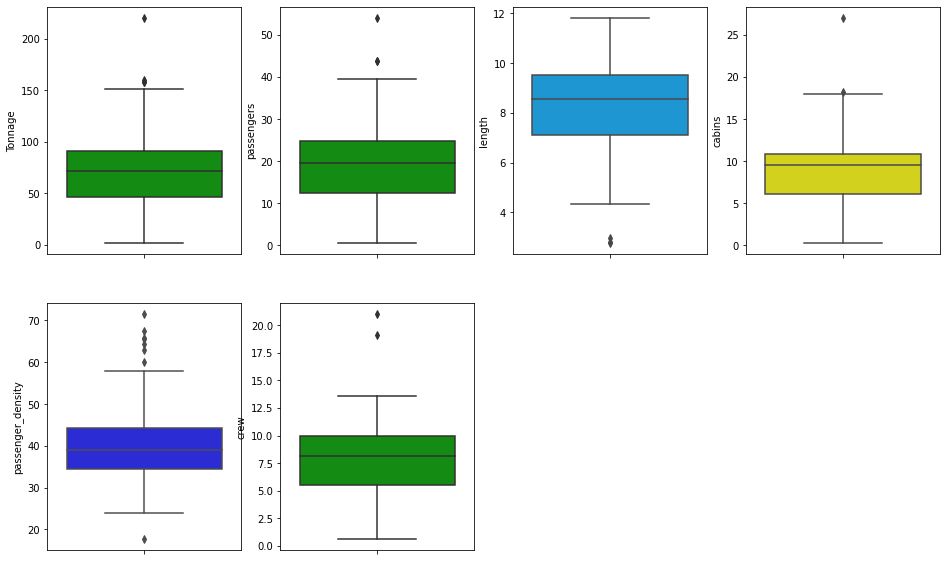

In [8]:
def plot_boxplots(df, numeric_col, n):
    """
    n refers to the number of plots per row
    """
    colors = ["#F0F000","#F00000","#00A000","#00A0F0","#1010F0"]
    plt.figure(figsize=(4*n,10))
    for i in range(len(numeric_col)):
        row = len(numeric_col) // n + 1
        column = n
        plt.subplot(row, n, i+1)
        sns.boxplot(df[numeric_col[i]], orient='v', color=random.choice(colors))
        
ax = plot_boxplots(df, numeric_col, 4)

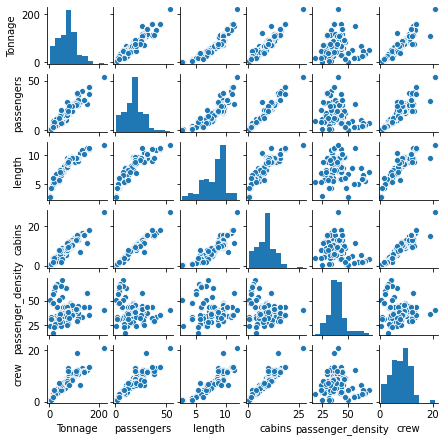

In [9]:
# plot a scatter matrix to find dependency
ax = sns.pairplot(df[numeric_col], height=1.0)

Observe that several of these variables are highly correlated.

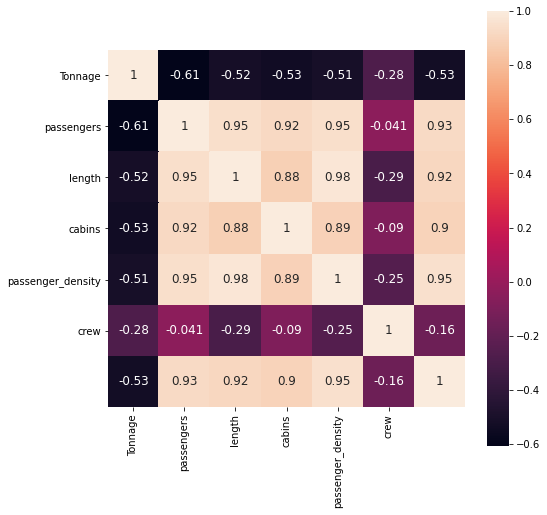

In [10]:
plt.figure(figsize=(8,8))
ax = sns.heatmap(df.corr(),
             cbar=True,
             annot=True,
             square=True,
             annot_kws={'size': 12},
             yticklabels=numeric_col,
             xticklabels=numeric_col)

We can achieve roughly the same matrix by using a covariance matrix. However, covariance changes with respect to the scale of the variable. Thus we need to do feature scaling first.

In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# scaling the matrix
matrix_scaled = scaler.fit_transform(df[numeric_col])

# compute the covariance matrix
cov_matrix = np.cov(matrix_scaled.T)

<AxesSubplot:>

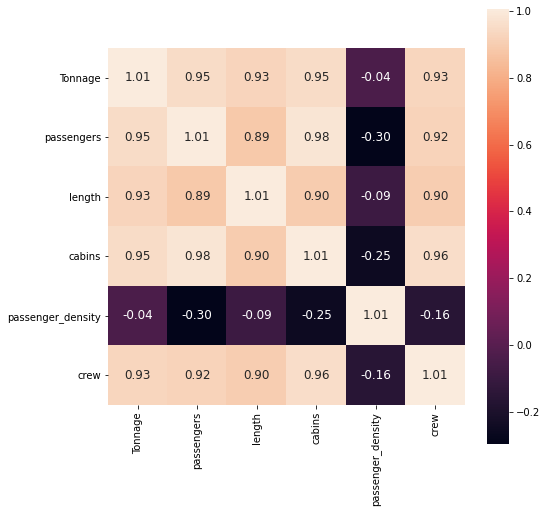

In [12]:
plt.figure(figsize=(8,8))
ax = sns.heatmap(cov_matrix,
             cbar=True,
             annot=True,
             square=True,
             fmt='.2f',
             annot_kws={'size': 12},
             yticklabels=numeric_col,
             xticklabels=numeric_col)

And there we go, we got the same thing. Note that even though there are 4 variables highly correlated with crew size, they themselves are highly correlated. 

# Model Buiding

We can do one hot encoding for the Cruise_line variable.

In [13]:
# get dummy variables
encoded_df = pd.get_dummies(df)

encoded_df.head()

,Age,Tonnage,passengers,length,cabins,passenger_density,crew,Cruise_line_Azamara,Cruise_line_Carnival,Cruise_line_Celebrity,...,Cruise_line_Oceania,Cruise_line_Orient,Cruise_line_P&O,Cruise_line_Princess,Cruise_line_Regent_Seven_Seas,Cruise_line_Royal_Caribbean,Cruise_line_Seabourn,Cruise_line_Silversea,Cruise_line_Star,Cruise_line_Windstar
0,6,30.277,6.94,5.94,3.55,42.64,3.55,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,6,30.277,6.94,5.94,3.55,42.64,3.55,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,26,47.262,14.86,7.22,7.43,31.80,6.70,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,11,110.000,29.74,9.53,14.88,36.99,19.10,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,17,101.353,26.42,8.92,13.21,38.36,10.00,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
from sklearn.model_selection import train_test_split

# train test split
X = encoded_df.drop('crew',axis=1).to_numpy()
y = df['crew'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X,  y, test_size=0.3, random_state=0) 

In [28]:
# Build a simple linear regression model

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)
y_train_pred = lr.predict(X_train)

print('Training Data Results')
print('MSE:', MSE(y_train, y_train_pred))
print('r2_score', r2_score(y_train, y_train_pred))

print('Test Data Results:')
print('MSE:', MSE(y_test, y_pred))
print('r2_score', r2_score(y_test, y_pred))
print('r-squared:', lr.score(X_test, y_test))

Training Data Results
MSE: 0.7550965549210051
r2_score 0.9418325774082726
Test Data Results:
MSE: 0.5449024509759401
r2_score 0.9458737294052356
r-squared: 0.9458737294052356


This is a pretty good result. An r-squared of 0.95 means that approximately 95% of the data is explained by our model. Note that the r2_score is the same thing as the score method of LinearRegression.

Next we'll take a look at the residual plots to see how our simple linear regression model performs. In other words, we want to examine whether a linear model is reasonable for the data.

Text(0, 0.5, 'Residual')

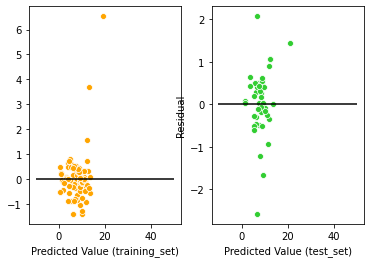

In [24]:
plt.subplot(1,2,1)
ax = sns.scatterplot(y_train, y_train - y_train_pred, color = 'orange' )
ax = ax.hlines(y=0, xmin=-10, xmax=50, color='black', lw=1.5)
plt.xlabel('Predicted Value (training_set)')

plt.subplot(1,2,2)
ax = sns.scatterplot(y_test, y_test - y_pred, color='limegreen')
ax = ax.hlines(y=0, xmin=-10, xmax=50, color='black', lw=1.5)
plt.xlabel('Predicted Value (test_set)')
plt.ylabel('Residual')

Observe that the residuals scattered around 0 and the positive and negative values seem to be well-balanced. Also, there seems to be no emerging patterns when the predicted crew size changes. 